In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data

In [2]:
movies = pd.read_csv('data/movie_plots.csv')
movies

,Release Year,Title,Genre,Plot
0,1903,The Great Train Robbery,western,The film opens with two bandits breaking into ...
1,1904,The Suburbanite,comedy,The film is about a family who move to the sub...
2,1907,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...
3,1907,Laughing Gas,comedy,The plot is that of a black woman going to the...
4,1908,The Adventures of Dollie,drama,On a beautiful summer day a father and mother ...
...,...,...,...,...
17091,2011,Once Upon a Time in Anatolia,drama,"Through the night, three cars carry a small gr..."
17092,2013,Selam,drama,The film opens with a Senegalese boy named Kha...
17093,2013,Particle (film),drama,"Zeynep lost her job at weaving factory, and he..."
17094,2017,Çalgı Çengi İkimiz,comedy,"Two musicians, Salih and Gürkan, described the..."


In [3]:
movies.Genre.value_counts()

drama        5958
comedy       4383
horror       1155
action       1105
thriller      977
romance       932
western       857
sci-fi        645
crime         563
adventure     521
Name: Genre, dtype: int64

In [4]:
movies = pd.concat([movies, movies.Genre.str.get_dummies()], axis=1)

In [5]:
movies_train, movies_test = train_test_split(movies, test_size=0.2, shuffle=True)
movies_train

,Release Year,Title,Genre,Plot,action,adventure,comedy,crime,drama,horror,romance,sci-fi,thriller,western
264,1921,I Do,comedy,The Boy meets and marries The Girl. A year lat...,0,0,1,0,0,0,0,0,0,0
6015,1982,Death Wish II,action,Paul Kersey has managed to recover from his sh...,1,0,0,0,0,0,0,0,0,0
14548,1994,Zaalim,action,"Judge Somnath lives with his wife, three sons,...",1,0,0,0,0,0,0,0,0,0
3487,1953,Wicked Woman,drama,A blonde floozy (Beverly Michaels) drifts into...,0,0,0,0,1,0,0,0,0,0
14273,1974,International Crook,crime,"Superintendent of Police, Rajesh, is asked to ...",0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11092,1932,Condemned to Death,crime,A respected judge leads a double life as a mur...,0,0,0,1,0,0,0,0,0,0
1910,1941,Ringside Maisie,comedy,"While on her way to a dancing job at a resort,...",0,0,1,0,0,0,0,0,0,0
8115,1996,Sgt. Bilko,comedy,Master Sergeant Ernest G. Bilko is in charge o...,0,0,1,0,0,0,0,0,0,0
16015,2015,Vai Raja Vai,thriller,Karthik (Gautham Karthik) is a middle-class bo...,0,0,0,0,0,0,0,0,1,0


In [6]:
tfidf = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
x_train = tfidf.fit_transform(movies_train.Plot)
x_test  = tfidf.transform(movies_test.Plot)

In [7]:
genres = movies.columns[4:]
y_train = movies_train[genres]
y_test = movies_test[genres]

# Naive Bayes Classifier

In [8]:
multinomialNB = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
multinomialNB.fit(x_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [9]:
prediction = multinomialNB.predict_proba(x_test)
print('Accuracy:', accuracy_score(y_test.values.argmax(axis=1), prediction.argmax(axis=1)))

Accuracy: 0.5409356725146199


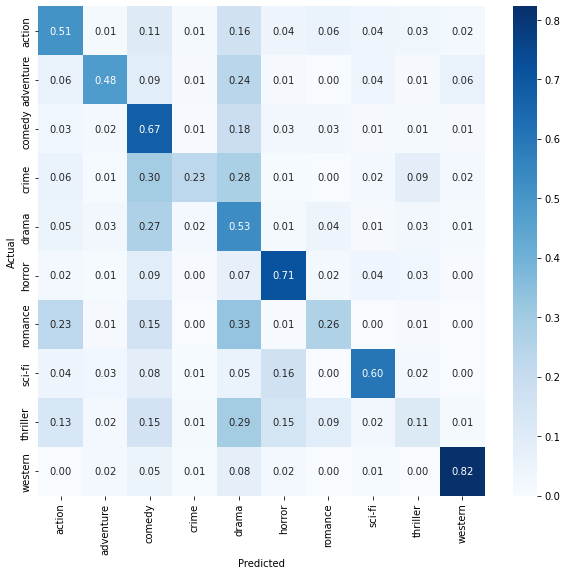

In [10]:
fig, ax = plt.subplots(figsize=(10,9))
cm = confusion_matrix(y_test.values.argmax(axis=1), prediction.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=genres, yticklabels=genres, ax=ax, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
print(classification_report(y_test.values.argmax(axis=1), prediction.argmax(axis=1), target_names=genres))

              precision    recall  f1-score   support

      action       0.37      0.51      0.43       208
   adventure       0.42      0.48      0.45       100
      comedy       0.55      0.67      0.61       879
       crime       0.38      0.23      0.28       105
       drama       0.61      0.53      0.57      1203
      horror       0.60      0.71      0.65       231
     romance       0.30      0.26      0.28       191
      sci-fi       0.61      0.60      0.61       136
    thriller       0.25      0.11      0.15       215
     western       0.75      0.82      0.78       152

    accuracy                           0.54      3420
   macro avg       0.48      0.49      0.48      3420
weighted avg       0.53      0.54      0.53      3420



# Support Vector Classifier

In [12]:
linearSVC = OneVsRestClassifier(CalibratedClassifierCV(LinearSVC()), n_jobs=1)
linearSVC.fit(x_train, y_train)

OneVsRestClassifier(estimator=CalibratedClassifierCV(base_estimator=LinearSVC()),
                    n_jobs=1)

In [13]:
prediction = linearSVC.predict_proba(x_test)
print('Accuracy:', accuracy_score(y_test.values.argmax(axis=1), prediction.argmax(axis=1)))

Accuracy: 0.5236842105263158


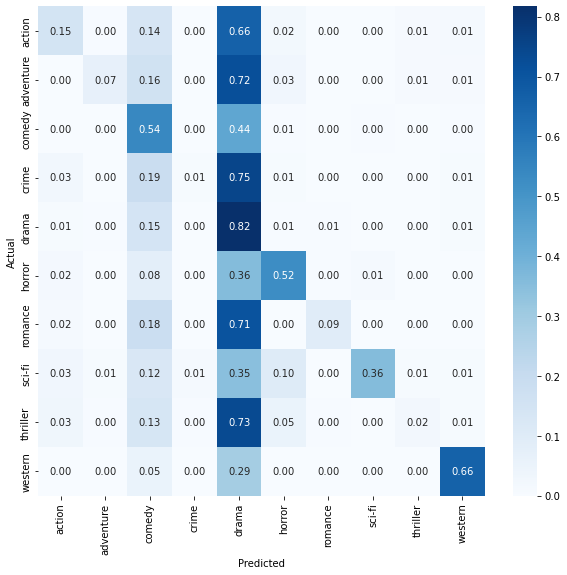

In [14]:
fig, ax = plt.subplots(figsize=(10,9))
cm = confusion_matrix(y_test.values.argmax(axis=1), prediction.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=genres, yticklabels=genres, ax=ax, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
print(classification_report(y_test.values.argmax(axis=1), prediction.argmax(axis=1), target_names=genres))

              precision    recall  f1-score   support

      action       0.49      0.15      0.23       208
   adventure       0.47      0.07      0.12       100
      comedy       0.58      0.54      0.56       879
       crime       0.17      0.01      0.02       105
       drama       0.46      0.82      0.59      1203
      horror       0.73      0.52      0.61       231
     romance       0.62      0.09      0.16       191
      sci-fi       0.86      0.36      0.51       136
    thriller       0.42      0.02      0.04       215
     western       0.83      0.66      0.73       152

    accuracy                           0.52      3420
   macro avg       0.56      0.32      0.36      3420
weighted avg       0.54      0.52      0.48      3420



# DistilBERT Classifier

In [ ]:
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(movies_train.Plot.to_list(), padding=True, truncation=True)
test_encodings = tokenizer(movies_test.Plot.to_list(), padding=True, truncation=True)

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test.values))

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", problem_type="multi_label_classification", num_labels=len(genres))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
retrain = False

if retrain:
    batch_size = 16
    model.fit(train_dataset.shuffle(len(movies_train.Plot)).batch(batch_size), epochs=3, batch_size=batch_size)
    model.save_pretrained('models/')
else:
    model.load_weights('models/distilbert_finetuned.h5')

In [20]:
prediction = model.predict(test_dataset.batch(16))
print('Accuracy:', accuracy_score(y_test.values.argmax(axis=1), prediction[0].argmax(axis=1)))

Accuracy: 0.8716374269005848


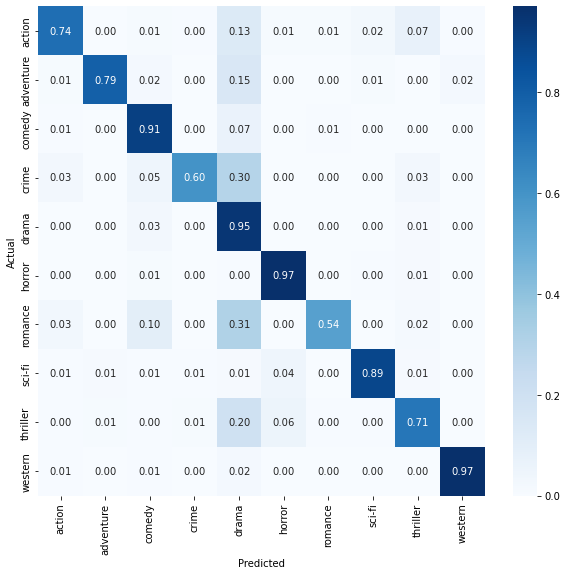

In [21]:
fig, ax = plt.subplots(figsize=(10,9))
cm = confusion_matrix(y_test.values.argmax(axis=1), prediction[0].argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=genres, yticklabels=genres, ax=ax, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
print(classification_report(y_test.values.argmax(axis=1), prediction[0].argmax(axis=1), target_names=genres))

              precision    recall  f1-score   support

      action       0.87      0.74      0.80       208
   adventure       0.92      0.79      0.85       100
      comedy       0.92      0.91      0.92       879
       crime       0.89      0.60      0.72       105
       drama       0.83      0.95      0.88      1203
      horror       0.90      0.97      0.93       231
     romance       0.90      0.54      0.68       191
      sci-fi       0.91      0.89      0.90       136
    thriller       0.78      0.71      0.74       215
     western       0.96      0.97      0.96       152

    accuracy                           0.87      3420
   macro avg       0.89      0.81      0.84      3420
weighted avg       0.87      0.87      0.87      3420

